In [136]:
import os
import matplotlib.pyplot as plt


import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator as IDG
# from tensorflow.keras.preprocessing import image_from_directory

In [137]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [138]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [139]:
inp_shape = X_train.shape[1:]
print(inp_shape)

(32, 32, 3)


In [140]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [141]:
X_train = X_train / 255
X_test = X_test / 255

In [41]:
datagen = IDG(
    rescale=1/.255,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest',
    rotation_range=30,
)

datagen.fit(X_train)

In [142]:
model = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='valid', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3,3), activation='relu', padding='valid'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.3),
    layers.Conv2D(64, (3,3), activation='relu', padding='valid'),
    layers.Conv2D(64, (3,3), activation='relu', padding='valid'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.3),
    
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.25),
#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.25),
    layers.Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_86 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_87 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_64 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_88 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_89 (Conv2D)          (None, 10, 10, 64)        36928     
                                                     

In [143]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])

In [146]:
history = model.fit(X_train, y_train, epochs=15, batch_size = 32, validation_data=(X_test, y_test), verbose=1)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

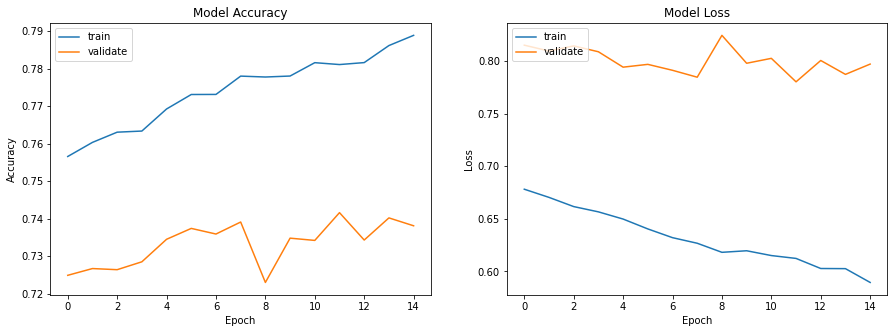

In [119]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

plotmodelhistory(history)